<a href="https://colab.research.google.com/github/SantonioTheFirst/DataAnalysis/blob/main/lab4/task1%2Btask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/preprocessed.csv', header=0, compression='xz', index_col='Unnamed: 0')

In [ ]:
df.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,1.415828,-1.400576,-1.405702,0.664386,0.695301,-1.836777,-1.709542,-0.516186,-0.595345,-1.115364,-1.379297,-1.004951,0.602448,0.597412,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.67383,0.0,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,0.0,-0.021331,-0.098501,-0.271725,-0.079592,1.039382,-0.002858,0.0,-0.242763,-0.051389,-0.882806,-0.213485,...,-0.007562,0.0,-0.011785,-0.026822,-0.002858,-0.431618,-0.723924,-0.224726,-0.139955,-0.201795,-0.172652,-0.085777,-0.01617,-0.528063,-0.467479,-0.214046,-0.093784,0.516902,-0.278862,-0.44395,-0.503436,1.942778,-0.065959,-0.085586,-0.147871,-0.701566,-0.542299,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,1.0,0.0,CT
1,1.067531,-1.400576,-1.405702,0.664386,0.695301,0.502008,0.008909,-0.819351,-0.870776,-1.115364,-1.379297,-0.382199,0.602448,0.597412,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.67383,0.0,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,0.0,-0.021331,-0.098501,-0.271725,-0.079592,1.039382,-0.002858,0.0,-0.242763,-0.051389,-0.882806,-0.213485,...,-0.007562,0.0,-0.011785,-0.026822,-0.002858,-0.431618,-0.723924,-0.224726,-0.139955,-0.201795,-0.172652,-0.085777,-0.01617,-0.528063,-0.467479,-0.214046,-0.093784,0.516902,-0.278862,-0.44395,-0.503436,1.942778,-0.065959,-0.085586,-0.147871,-0.701566,-0.542299,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,1.0,0.0,CT
2,-0.034094,-1.400576,-1.405702,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,-0.883109,-1.115364,-1.379297,-0.382199,-0.227087,-0.216709,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.67383,0.0,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,0.0,-0.021331,-0.098501,-0.271725,-0.079592,0.424292,-0.002858,0.0,-0.242763,-0.051389,-0.882806,-0.213485,...,-0.007562,0.0,-0.011785,-0.026822,-0.002858,-0.431618,-0.723924,-0.224726,-0.139955,-0.201795,-0.172652,-0.085777,-0.01617,-0.528063,-0.467479,-0.214046,-0.093784,0.516902,-0.278862,-0.44395,-0.503436,-0.409385,-0.065959,-0.085586,-0.147871,-0.701566,-0.542299,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,1.0,0.0,CT
3,-0.401302,-1.400576,-1.405702,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,-0.883109,-1.115364,-1.379297,-0.382199,-0.227087,-0.216709,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.67383,0.0,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,0.0,-0.021331,-0.098501,-0.271725,-0.079592,-0.190798,-0.002858,0.0,-0.242763,-0.051389,-0.882806,-0.213485,...,-0.007562,0.0,-0.011785,-0.026822,-0.002858,-0.431618,-0.723924,-0.224726,-0.

In [ ]:
df.describe()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,122410.0,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,122410.0,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,122410.0,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,...,122410.0,1.224100e+05,122410.0,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,1.224100e+05,122410.000000,122410.000000
mean,-4.288946e-15,1.444837e-15,1.031806e-16,-3.982250e-15,1.310298e-14,6.196298e-16,-3.250783e-16,9.602799e-16,4.941064e-16,-1.999182e-15,4.433966e-15,4.512372e-15,8.059253e-15,6.020607e-15,3.752859e-14,-1.313554e-13,-5.484578e-14,1.591783e-14,2.072543e-14,-8.392321e-15,0.0,-9.969661e-15,-4.975392e-15,2.426783e-14,-1.289328e-14,-1.179309e-14,-9.396835e-15,3.039353e-15,0.0,6.671845e-15,7.822238e-17,-6.036948e-15,2.014328e-15,-1.059221e-14,-4.332365e-15,0.0,2.171959e-14,5.608958e-15,5.317876e-14,-8.296649e-15,...,0.0,-5.880275e-15,0.0,-1.257634e-14,1.386790e-14,-4.332829e-15,-8.531787e-14,1.026473e-13,2.051830e-14,-3.722903e-15,-2.389034e-15,1.088973e-14,1.758632e-14,-1.097471e-14,3.969766e-15,5.050164e-15,1.595003e-14,4.911342e-15,4.324666e-15,2.918422e-15,2.866921e-15,3.212743e-15,6.927636e-14,-3.890309e-15,-6.753036e-14,-3.989584e-15,-4.662043e-15,-4.906734e-15,3.183941e-15,-8.777591e-16,-1.321889e-14,1.317659e-14,3.834698e-15,6.439392e-15,-4.421712e-14,8.135692e-15,3.013521e-15,-4.397655e-15,3.520170,0.111788
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.0,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.0,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.0,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,0.0,1.000004e+00,0.0,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e

In [ ]:
X = df.drop(columns=['round_winner'])
y = df[['round_winner']]
test_size = int(0.2 * df.shape[0])
val_size = int(0.2 * df.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, shuffle=False)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(73446, 96) (24482, 96) (24482, 96)


In [ ]:
enc = OneHotEncoder(sparse=False)

In [ ]:
y_train = enc.fit_transform(np.array(y_train))
y_val = enc.transform(np.array(y_val))
y_test = enc.transform(np.array(y_test))

In [ ]:
y_train.shape

(73446, 2)

In [ ]:
X.shape[1:]

(96,)

# Задание класификации на данных из 2й лабы

In [ ]:
model = Sequential()
# model.add(Input(shape=X.shape[1:]))
model.add(Dense(256, activation='relu', input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               24832     
                                                                 
 batch_normalization_12 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 512)              

In [ ]:
labels = {'1': 'CT', '0': 'T'}

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-2),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
es = EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)
mch = ModelCheckpoint('best_model.h5', save_best_only=True)

In [ ]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    callbacks=[es, mch],
    validation_data=(X_val, y_val)
)

Epoch 1/100
1148/1148 [==============================] - 11s 9ms/step - loss: 0.5140 - accuracy: 0.7334 - val_loss: 0.4829 - val_accuracy: 0.7442
Epoch 2/100
1148/1148 [==============================] - 10s 8ms/step - loss: 0.4652 - accuracy: 0.7487 - val_loss: 0.4662 - val_accuracy: 0.7419
Epoch 3/100
1148/1148 [==============================] - 10s 8ms/step - loss: 0.4581 - accuracy: 0.7534 - val_loss: 0.4681 - val_accuracy: 0.7406
Epoch 4/100
1148/1148 [==============================] - 10s 9ms/step - loss: 0.4551 - accuracy: 0.7585 - val_loss: 0.4806 - val_accuracy: 0.7395
Epoch 5/100
1148/1148 [==============================] - 10s 8ms/step - loss: 0.4520 - accuracy: 0.7602 - val_loss: 0.4701 - val_accuracy: 0.7330
Epoch 6/100
1148/1148 [==============================] - 10s 8ms/step - loss: 0.4456 - accuracy: 0.7622 - val_loss: 0.4629 - val_accuracy: 0.7426
Epoch 7/100
1148/1148 [==============================] - 10s 9ms/step - loss: 0.4435 - accuracy: 0.7659 - val_loss: 0.4954 -

In [ ]:
model.evaluate(x=X_test, y=y_test)

766/766 [==============================] - 3s 4ms/step - loss: 0.4705 - accuracy: 0.7392


[0.47048482298851013, 0.7391961216926575]

In [ ]:
history.history

{'accuracy': [0.7333687543869019,
  0.7487269639968872,
  0.7533562183380127,
  0.7584620118141174,
  0.7601911425590515,
  0.7622062563896179,
  0.7659368515014648,
  0.7716962099075317,
  0.7734525799751282,
  0.7752634882926941,
  0.7809955477714539],
 'loss': [0.513991117477417,
  0.4652288258075714,
  0.4580995440483093,
  0.45511922240257263,
  0.4519939124584198,
  0.4456091523170471,
  0.4434950351715088,
  0.4373917281627655,
  0.4319920539855957,
  0.4292964041233063,
  0.4239126145839691],
 'val_accuracy': [0.7442202568054199,
  0.7418511509895325,
  0.7405849099159241,
  0.739482045173645,
  0.7329875230789185,
  0.7426272630691528,
  0.736336886882782,
  0.7389101982116699,
  0.7392778396606445,
  0.7445878386497498,
  0.7446695566177368],
 'val_loss': [0.4828853905200958,
  0.466174840927124,
  0.46810203790664673,
  0.4806303381919861,
  0.47010451555252075,
  0.4628729522228241,
  0.4953773021697998,
  0.5302706956863403,
  0.4848692715167999,
  0.4751489460468292,
  0.

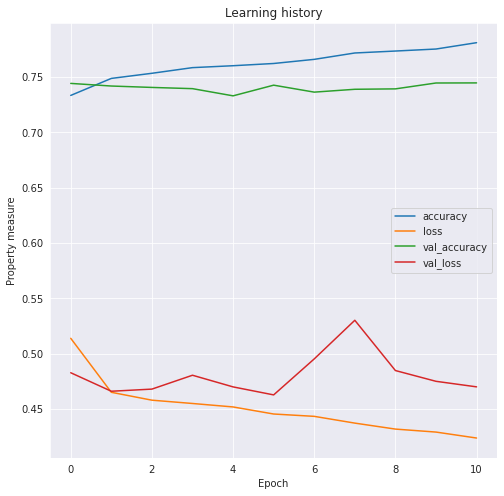

In [ ]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(8, 8))
sns.lineplot(x=np.arange(len(history.history['accuracy'])), y=history.history['accuracy'], label='accuracy')
sns.lineplot(x=np.arange(len(history.history['accuracy'])), y=history.history['loss'], label='loss')
sns.lineplot(x=np.arange(len(history.history['accuracy'])), y=history.history['val_accuracy'], label='val_accuracy')
sns.lineplot(x=np.arange(len(history.history['accuracy'])), y=history.history['val_loss'], label='val_loss')
plt.title('Learning history')
plt.xlabel('Epoch')
plt.ylabel('Property measure')
plt.show()

In [ ]:
sample = np.array(X_train.iloc[3])

In [ ]:
y_train[0]

array([1., 0.])

In [ ]:
y_train[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
df['round_winner'].head(5)

0    CT
1    CT
2    CT
3    CT
4    CT
Name: round_winner, dtype: object

In [ ]:
labels

{'0': 'T', '1': 'CT'}

In [ ]:
sample.shape

(96,)

In [ ]:
prediction = model.predict(np.expand_dims(sample, 0))
print([f'{i}: {j}' for i, j in zip(labels.values(), prediction[0])])

['CT: 0.5672023892402649', 'T: 0.4327976405620575']


# Перенос обучения с модели MobileNetV2

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d gpiosenka/balls-image-classification

 95% 188M/198M [00:06<00:00, 23.7MB/s]
100% 198M/198M [00:06<00:00, 30.0MB/s]


In [ ]:
!unzip -q balls-image-classification.zip

In [ ]:
df = pd.read_csv('balls/balls.csv')

In [ ]:
df.describe()

,filepaths,labels,data set
count,3100,3100,3100
unique,3100,24,3
top,train/eyeballs/076.jpg,cannon ball,train
freq,1,193,2860


In [ ]:
df.isna().any()

filepaths    False
labels       False
data set     False
dtype: bool

In [ ]:
from PIL import Image

In [ ]:
im = Image.open('balls/train/eyeballs/076.jpg')

In [ ]:
im.size

(224, 224)

In [ ]:
IMAGE_SIZE = (224, 224, 3)
BATCH_SIZE = 64
EPOCHS = 50
STEPS_PER_EPOCH = 100
NUM_CLASSES = df['labels'].nunique()

In [ ]:
base_model = MobileNetV2(input_shape=IMAGE_SIZE, include_top=False, pooling='avg')

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

In [ ]:
model = Sequential()
# model.add(tensorflow.keras.layers.Flatten())
model.add(Dense(256, activation='relu', input_shape=base_model.output.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', input_shape=base_model.output.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', input_shape=base_model.output.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=10, width_shift_range=0.2,
    height_shift_range=0.2, zoom_range=0.3,
    channel_shift_range=0.1, horizontal_flip=True,
    vertical_flip=True, rescale=1. / 255.
)

In [ ]:
train_data = image_generator.flow_from_directory(
    'balls/train', target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0]),
    shuffle=False, batch_size=BATCH_SIZE
)

val_data = image_generator.flow_from_directory(
    'balls/valid', target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0]),
    shuffle=False, batch_size=BATCH_SIZE
)

test_data = image_generator.flow_from_directory(
    'balls/test', target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0]),
    shuffle=False, batch_size=BATCH_SIZE
)

Found 2860 images belonging to 24 classes.
Found 120 images belonging to 24 classes.
Found 120 images belonging to 24 classes.


In [ ]:
train_bottleneck_features = base_model.predict(train_data, batch_size=BATCH_SIZE)
np.save(open('train_bottleneck_features.npy', 'wb'), train_bottleneck_features)

val_bottleneck_features = base_model.predict(val_data, batch_size=BATCH_SIZE)
np.save(open('val_bottleneck_features.npy', 'wb'), train_bottleneck_features)

test_bottleneck_features = base_model.predict(test_data, batch_size=BATCH_SIZE)
np.save(open('test_bottleneck_features.npy', 'wb'), train_bottleneck_features)

In [ ]:
model = Sequential()
model.add(base_model)
model.add(tensorflow.keras.layers.Flatten())
model.add(Dense(256, activation='relu', input_shape=base_model.output.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', input_shape=base_model.output.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', input_shape=base_model.output.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_1 = model.fit(
    train_data, batch_size=BATCH_SIZE, epochs=EPOCHS, #steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[
               EarlyStopping(min_delta=1e-2, patience=10, restore_best_weights=True),
               ModelCheckpoint('transfer_1.h5', save_best_only=True)
    ],
    validation_data=val_data, shuffle=True, validation_batch_size=BATCH_SIZE
)

Epoch 1/50
45/45 [==============================] - ETA: 0s - loss: 4.1530 - accuracy: 0.0423

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


45/45 [==============================] - 46s 917ms/step - loss: 4.1530 - accuracy: 0.0423 - val_loss: 2.6457 - val_accuracy: 0.3000
Epoch 2/50
45/45 [==============================] - 39s 873ms/step - loss: 3.6310 - accuracy: 0.0888 - val_loss: 2.2776 - val_accuracy: 0.4583
Epoch 3/50
45/45 [==============================] - 39s 872ms/step - loss: 3.4480 - accuracy: 0.1182 - val_loss: 2.0860 - val_accuracy: 0.4667
Epoch 4/50
45/45 [==============================] - 39s 874ms/step - loss: 3.3186 - accuracy: 0.1462 - val_loss: 1.8106 - val_accuracy: 0.5583
Epoch 5/50
45/45 [==============================] - 40s 880ms/step - loss: 3.2137 - accuracy: 0.1573 - val_loss: 1.5914 - val_accuracy: 0.6250
Epoch 6/50
45/45 [==============================] - 39s 867ms/step - loss: 3.1138 - accuracy: 0.2035 - val_loss: 1.6184 - val_accuracy: 0.5750
Epoch 7/50
45/45 [==============================] - 40s 880ms/step - loss: 3.0314 - accuracy: 0.1955 - val_loss: 1.5504 - val_accuracy: 0.5583
Epoch 8/50

In [ ]:
model.evaluate(test_data)

2/2 [==============================] - 2s 736ms/step - loss: 1.0626 - accuracy: 0.7583


[1.0626314878463745, 0.7583333253860474]

In [ ]:
for l in base_model.layers[-3:]:
    l.trainable = True

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-3]:
    layer.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
# model.compile(optimizer=Adam(learning_rate=1e-7), loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model.fit(
    train_data, batch_size=BATCH_SIZE, epochs=31, initial_epoch=21,
    callbacks=[
               EarlyStopping(min_delta=1e-4, patience=3, restore_best_weights=True),
               ModelCheckpoint('transfer_1.h5', save_best_only=True)
    ],
    validation_data=val_data, shuffle=True, validation_batch_size=BATCH_SIZE
)

Epoch 22/31
45/45 [==============================] - ETA: 0s - loss: 2.8432 - accuracy: 0.2682

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


45/45 [==============================] - 46s 921ms/step - loss: 2.8432 - accuracy: 0.2682 - val_loss: 1.2727 - val_accuracy: 0.6750
Epoch 23/31
45/45 [==============================] - 39s 855ms/step - loss: 2.8664 - accuracy: 0.2524 - val_loss: 1.3175 - val_accuracy: 0.6417
Epoch 24/31
45/45 [==============================] - 39s 857ms/step - loss: 2.8523 - accuracy: 0.2545 - val_loss: 1.3359 - val_accuracy: 0.6000
Epoch 25/31
45/45 [==============================] - 39s 864ms/step - loss: 2.8600 - accuracy: 0.2517 - val_loss: 1.3687 - val_accuracy: 0.6750


In [ ]:
model.evaluate(test_data)

2/2 [==============================] - 2s 740ms/step - loss: 1.1707 - accuracy: 0.7750


[1.170738935470581, 0.7749999761581421]

In [ ]:
image_gen = ImageDataGenerator(
    rotation_range=10, width_shift_range=0.2,
    height_shift_range=0.2, zoom_range=0.3,
    channel_shift_range=0.1, horizontal_flip=True,
    vertical_flip=True, rescale=1. / 255.
)

test_aug = image_generator.flow_from_directory(
    'balls/train', target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0]),
    shuffle=False, batch_size=BATCH_SIZE, save_to_dir='train', save_prefix='N'
)

Found 2860 images belonging to 24 classes.
